# import libraries

In [22]:
!pip install pydicom Pillow matplotlib

In [24]:
import os
import random
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

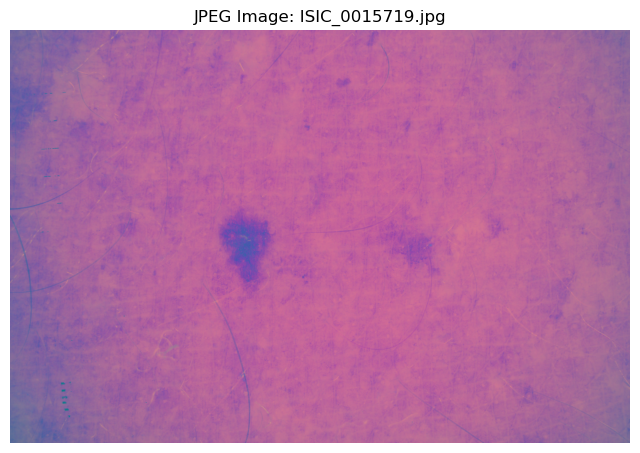

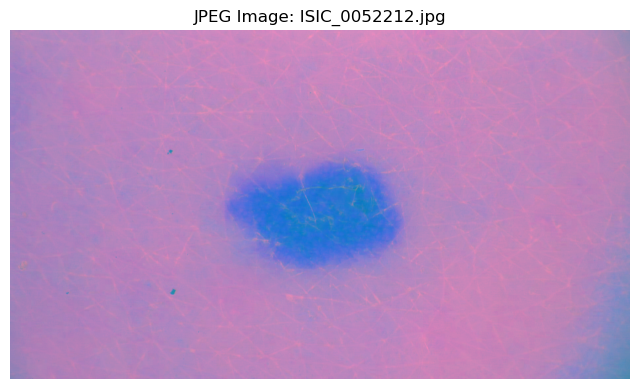

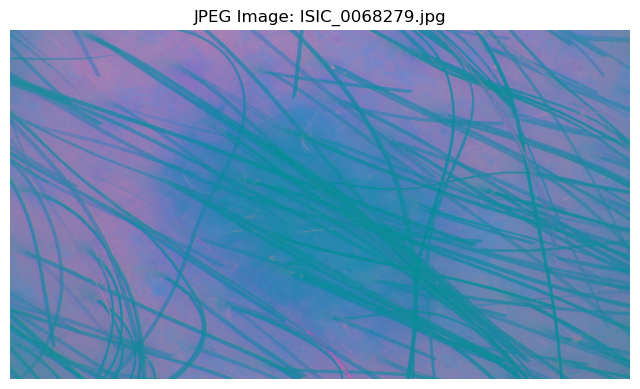

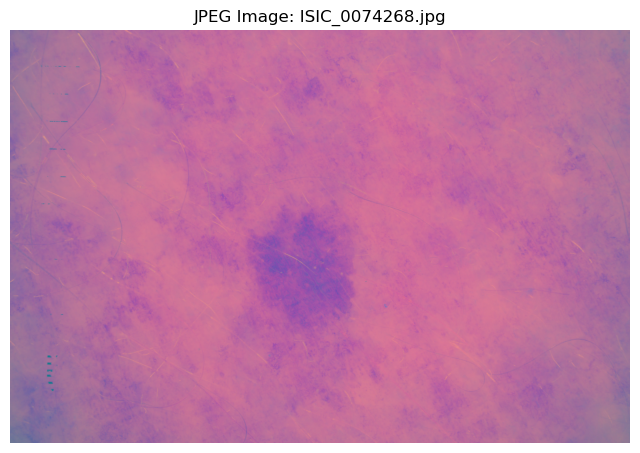

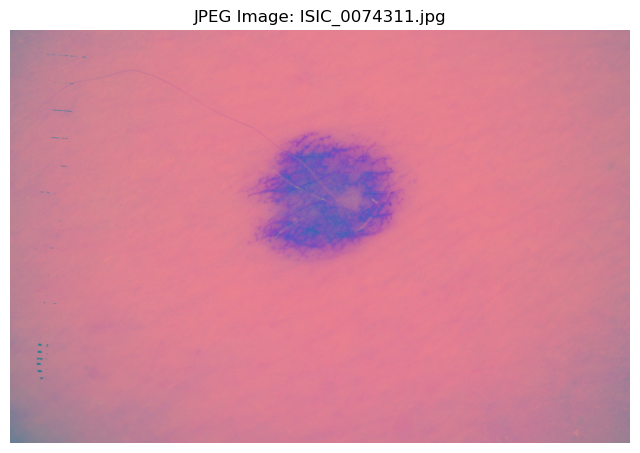

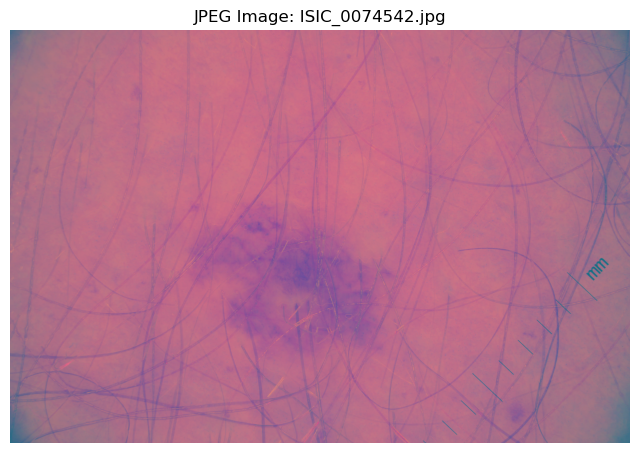

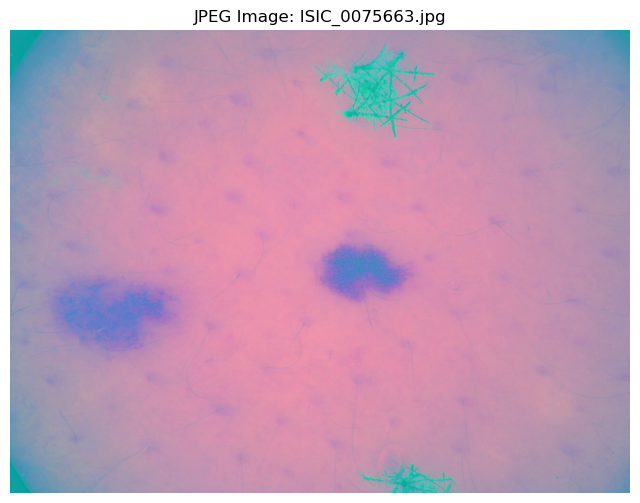

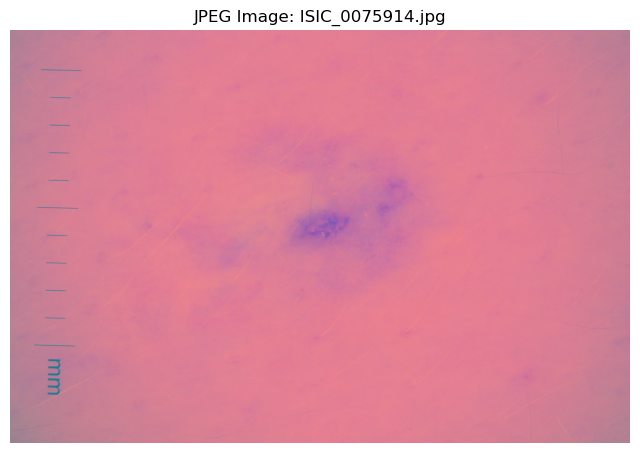

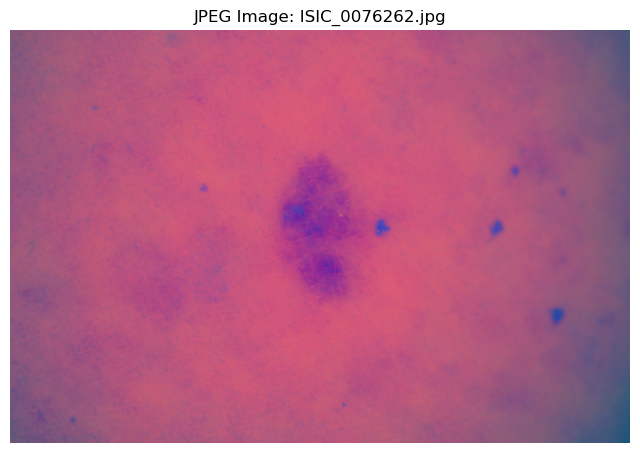

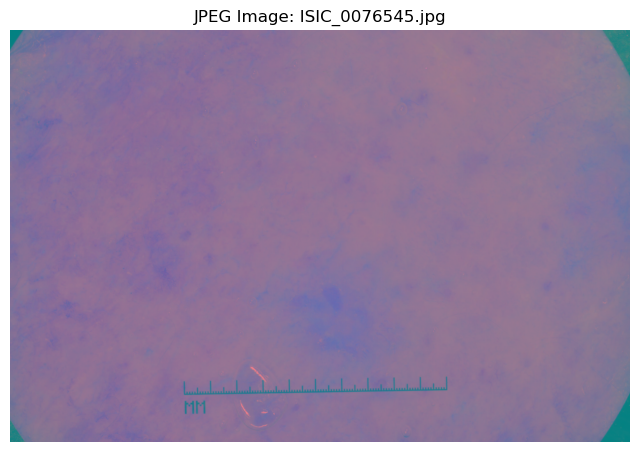

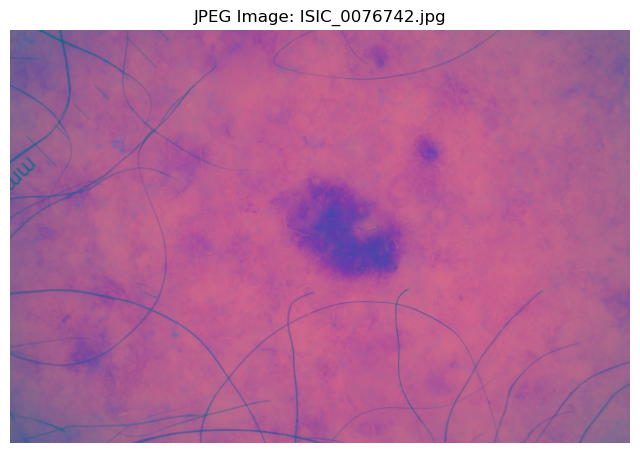

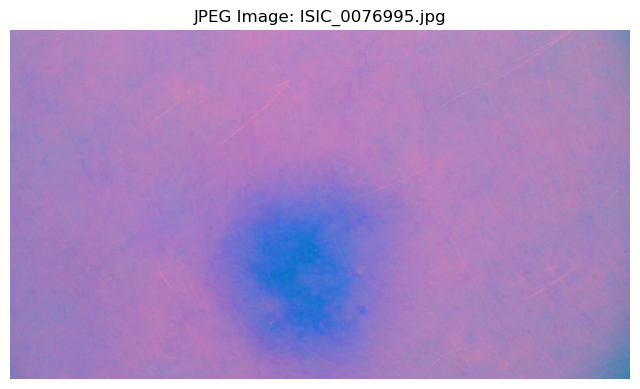

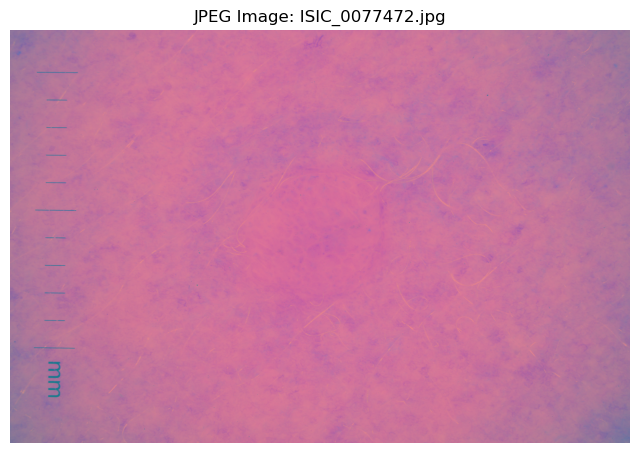

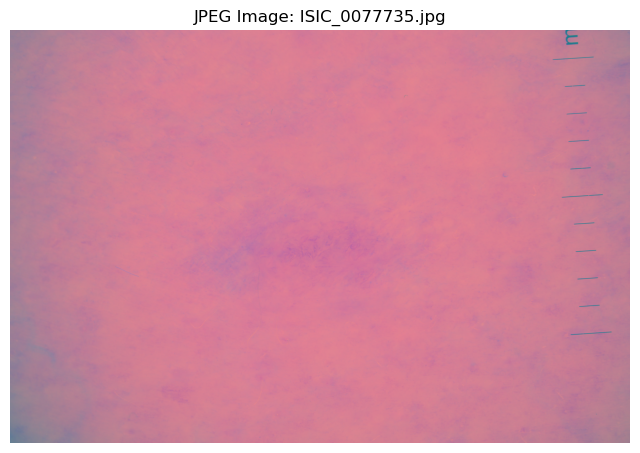

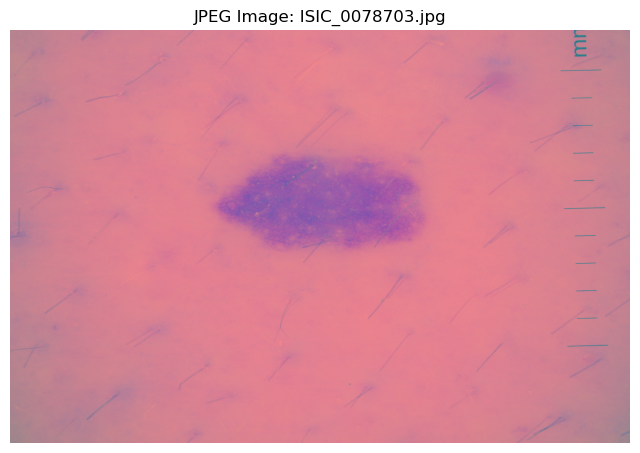

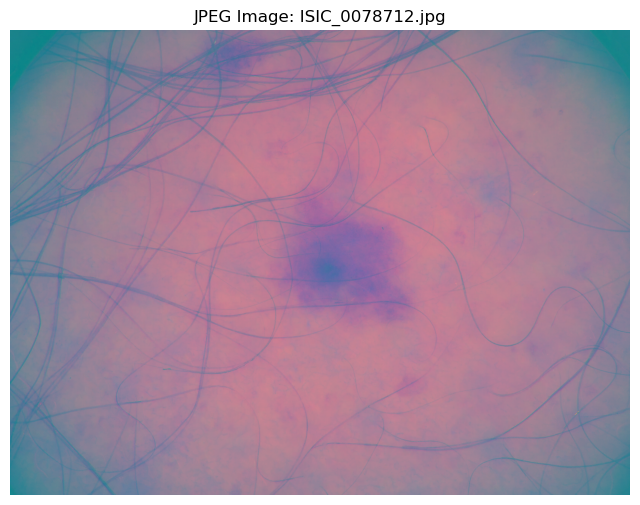

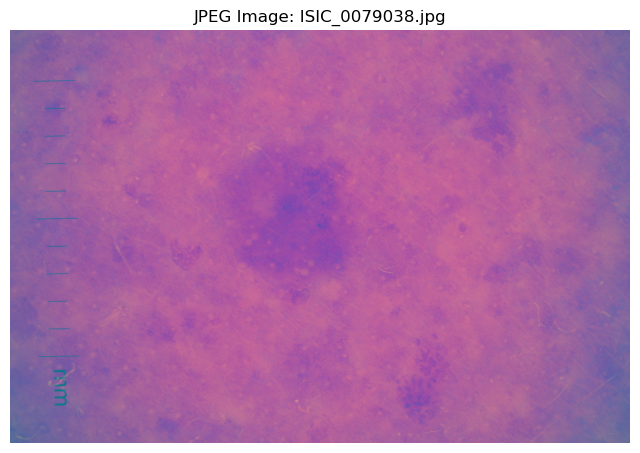

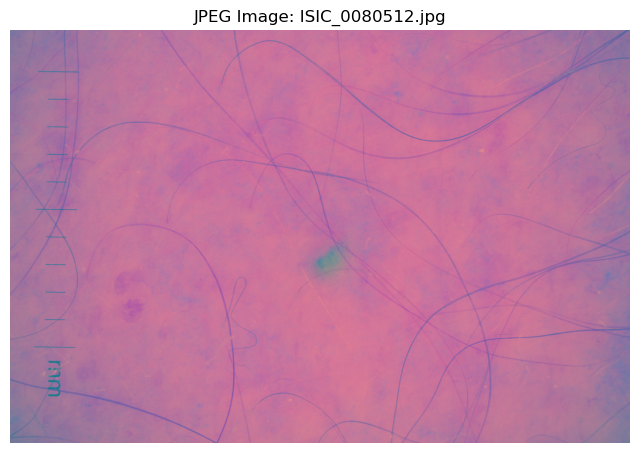

KeyboardInterrupt: 

In [28]:
# Directory paths
dicom_dir = r'C:\Users\Praktikant\Thesis_Hafeez\Dataset\DICOM\dicom_files'
jpeg_dir = r'C:\Users\Praktikant\Thesis_Hafeez\Dataset\DICOM\dicom_to_jpeg'

# Create output directory if it doesn't exist
os.makedirs(jpeg_dir, exist_ok=True)

def visualize_image(image, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def convert_dicom_to_jpeg(dicom_path, jpeg_path):
    # Load DICOM file
    dicom_file = pydicom.dcmread(dicom_path)
    
    # Extract pixel array and handle different photometric interpretations
    pixel_array = dicom_file.pixel_array

    if dicom_file.PhotometricInterpretation == 'MONOCHROME1':
        pixel_array = np.max(pixel_array) - pixel_array

    if 'WindowCenter' in dicom_file and 'WindowWidth' in dicom_file:
        center = dicom_file.WindowCenter
        width = dicom_file.WindowWidth
        if isinstance(center, pydicom.multival.MultiValue):
            center = center[0]
        if isinstance(width, pydicom.multival.MultiValue):
            width = width[0]
        lower = center - (width / 2)
        upper = center + (width / 2)
        pixel_array = np.clip(pixel_array, lower, upper)
    
    pixel_array = pixel_array - np.min(pixel_array)
    pixel_array = (pixel_array / np.max(pixel_array) * 255).astype(np.uint8)

    # Create an image from the array
    image = Image.fromarray(pixel_array)
    
    # Convert to RGB if needed for JPEG
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Save the image as JPEG with high quality
    image.save(jpeg_path, format='JPEG', quality=100)

    # Visualize the JPEG image
    visualize_image(image, f'JPEG Image: {os.path.basename(jpeg_path)}')

def process_dicom_directory(dicom_dir, jpeg_dir):
    for file_name in os.listdir(dicom_dir):
        if file_name.lower().endswith('.dcm'):
            dicom_path = os.path.join(dicom_dir, file_name)
            jpeg_path = os.path.join(jpeg_dir, file_name.replace('.dcm', '.jpg'))
            convert_dicom_to_jpeg(dicom_path, jpeg_path)

# Process all DICOM files in the directory
process_dicom_directory(dicom_dir, jpeg_dir)